In [131]:
import pandas as pd
import re

In [379]:
suc = pd.read_csv('succeess.csv')
let = pd.read_csv('letters.csv')

In [93]:
let = let.drop(['1'], axis='columns')
let = let.drop(['Unnamed: 4'], axis='columns')
let = let.drop(['Unnamed: 5'], axis='columns')
let = let.drop(['Unnamed: 6'], axis='columns')
let = let.drop(['Unnamed: 7'], axis='columns')
let = let.drop(['Unnamed: 8'], axis='columns')
let = let.drop(['Unnamed: 9'], axis='columns')
let = let.drop(['Unnamed: 10'], axis='columns')
let = let.drop(['Unnamed: 11'], axis='columns')
let = let.drop(['Unnamed: 12'], axis='columns')
let = let.drop(['Unnamed: 13'], axis='columns')
let = let.drop(['Unnamed: 14'], axis='columns')
let = let.drop(['Unnamed: 15'], axis='columns')
let = let.drop(['Unnamed: 16'], axis='columns')
let = let.drop(['Unnamed: 17'], axis='columns')
let = let.drop(['Unnamed: 18'], axis='columns')
let = let.drop(['Unnamed: 19'], axis='columns')
let = let.drop(['Unnamed: 20'], axis='columns')
let = let.drop(['Unnamed: 21'], axis='columns')

In [94]:
let_s = let.sort_values('e-mail')
suc_s = suc.sort_values('E-mail')

Та самая штука которая позволила сопоставить емейлы с текстом писем собственно:

In [95]:
for li in range(0,7274):
    for si in range(0,6931):
        if  let_s['e-mail'][li] == suc_s['E-mail'][si]:
            suc.at[si,'text'] = let['text'][li]

Запись в файл полезных данных:

In [226]:
df.to_csv(r'final6.csv')

In [102]:
suc = suc[suc["text"] != "a"]

In [208]:
df.reset_index(level=0, inplace=True)

In [148]:
a = re.search('2018', df['year'][1])
type(a)

_sre.SRE_Match

Немного о том, как привести значения в текстах к одному виду:

In [204]:
for i in range(0,6633):
    st = re.findall('Hold', df['in_out'][i])
    if  st != []:
        df['in_out'][i] = 'hold'

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


TypeError: expected string or bytes-like object

In [225]:
df = df.rename(columns={"В ответе присутствуют убеждения, установки, противоречащие ценностям Программы": "worse_motives"})

In [230]:
new = df[['id', 'in_out', 'year', 'no_motives', 'humble_motives', 'good_motives', 'bad_motives', '>2_motives', 'worse_motives','mistakes', 'summ','text']].copy()

In [270]:
new.to_csv(r'clear1.csv')

In [ ]:
Средняя длина писем

In [275]:
l = []
for i in range(0, 6633):
    if type(new['text'][i]) == str:
        a = len(new['text'][i])
        l.append(a)
    else:
        pass

In [261]:
def avg(lst): 
    return sum(lst) / len(lst) 

In [276]:
print(avg(l))
print(min(l))
print(max(l))

740.1010405670336
1
7840


Разные данные по годам

In [271]:
new_s = new.sort_values('year')

In [380]:
new_s['year'].unique()
new_year_size = new_s.groupby('year').size()
new_year_size

year
2015     651
2016    2884
2017     673
2018    2302
2019     123
dtype: int64

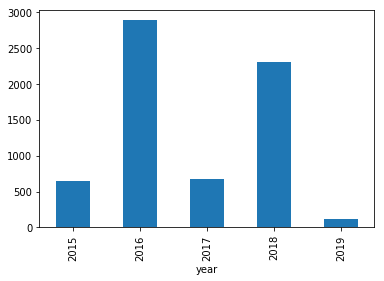

In [274]:
%matplotlib inline
new_year_size.plot.bar()

In [277]:
l = []
for i in range(0, 6633):
    if new['year'][i] == '2015':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

857.8307692307692
1
3429


In [278]:
l = []
for i in range(0, 6633):
    if new['year'][i] == '2016':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

678.1359223300971
1
7840


In [279]:
l = []
for i in range(0, 6633):
    if new['year'][i] == '2017':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

716.6864784546806
1
3105


In [280]:
l = []
for i in range(0, 6633):
    if new['year'][i] == '2018':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

777.1768796175576
1
4344


In [281]:
l = []
for i in range(0, 6633):
    if new['year'][i] == '2019':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

1005.3821138211382
3
3376


In [282]:
new_s['in_out'].unique()
new_in_out_size = new_s.groupby('in_out').size()
new_in_out_size

in_out
hold                       1025
in                         2628
out                        2976
Не проходил этап анкеты       3
dtype: int64

In [301]:
df2019 = new.loc[new['year'] == '2019']
df2018 = new.loc[new['year'] == '2018']
df2017 = new.loc[new['year'] == '2017']
df2016 = new.loc[new['year'] == '2016']
df2015 = new.loc[new['year'] == '2015']

In [302]:
df2019['in_out'].unique()
df2019_in_out_size = df2019.groupby('in_out').size()
df2019_in_out_size

in_out
hold                       12
in                         35
out                        74
Не проходил этап анкеты     1
dtype: int64

In [303]:
df2018['in_out'].unique()
df2018_in_out_size = df2018.groupby('in_out').size()
df2018_in_out_size

in_out
hold                        433
in                          688
out                        1179
Не проходил этап анкеты       2
dtype: int64

In [304]:
df2017['in_out'].unique()
df2017_in_out_size = df2017.groupby('in_out').size()
df2017_in_out_size

in_out
hold    134
in      207
out     332
dtype: int64

In [305]:
df2016['in_out'].unique()
df2016_in_out_size = df2016.groupby('in_out').size()
df2016_in_out_size

in_out
hold     374
in      1283
out     1227
dtype: int64

In [306]:
df2015['in_out'].unique()
df2015_in_out_size = df2015.groupby('in_out').size()
df2015_in_out_size

in_out
hold     72
in      415
out     164
dtype: int64

Считаем слова

In [366]:
lst = []
for i in df2019['text']:
        l = word_tokenize(i)
        lst.append(len(l))
print(avg(lst))
print(min(lst))
print(max(lst))

143.22764227642276
0
493


In [369]:
lst = []
for i in df2018['text']:
    try:
        l = word_tokenize(i)
        lst.append(len(l))
    except TypeError:
        pass
print(avg(lst))
print(min(lst))
print(max(lst))

137.13515862668405
1
641


In [370]:
lst = []
for i in df2017['text']:
    try:
        l = word_tokenize(i)
        lst.append(len(l))
    except TypeError:
        pass
print(avg(lst))
print(min(lst))
print(max(lst))

126.75631500742942
1
623


In [371]:
lst = []
for i in df2016['text']:
    try:
        l = word_tokenize(i)
        lst.append(len(l))
    except TypeError:
        pass
print(avg(lst))
print(min(lst))
print(max(lst))

119.01040221914009
1
1288


In [372]:
lst = []
for i in df2015['text']:
    try:
        l = word_tokenize(i)
        lst.append(len(l))
    except TypeError:
        pass
print(avg(lst))
print(min(lst))
print(max(lst))

151.09692307692308
1
605


In [324]:
lst = []
for i in new['text']:
    try:
        l = i.split(' ')
        lst.append(len(l))
    except AttributeError:
        pass
print(avg(lst))
print(min(lst))
print(max(lst))

111.44970592670789
1
1108


# Датасеты по  in out

In [435]:
#df_in = new.loc[new['in_out'] == 'in']
#df_out = new.loc[new['in_out'] == 'out']

len(df_out)

2964

In [ ]:
for i in df_out['text']:
    try:
        l = word_tokenize(i)
    except TypeError:
        df_out.text = df_out.text.replace(i, 'n')

In [434]:
l = [1070,1617,1729,3018,3102,3152,3310,3397,4524,5686,6436,6468]
for i in l:
    df_out = df_out.drop(i)

In [436]:
#df_out[df_out['text'].map(len) < 2]

,id,in_out,year,no_motives,humble_motives,good_motives,bad_motives,>2_motives,worse_motives,mistakes,summ,text


In [403]:
l = []
for i in range(0, 6633):
    if new['in_out'][i] == 'in':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

1080.736301369863
1
7840


In [364]:
l = []
for i in range(0, 6633):
    if new['in_out'][i] == 'out':
        if type(new['text'][i]) == str:
            a = len(new['text'][i])
            l.append(a)
        else:
            pass
print(avg(l))
print(min(l))
print(max(l))

445.50571620712844
1
4344


In [438]:
lst = []
for i in df_out['text']:
    try:
        l = word_tokenize(i)
        lst.append(len(l))
    except TypeError:
        df_out.text = df_out.text.replace(i, 'n')
print(avg(lst))
print(min(lst))
print(max(lst))

77.87314439946019
1
650


In [330]:
from pymystem3 import Mystem

# создаём анализатор без снятия неоднозначности
mystemmer = Mystem(grammar_info=True, disambiguation=False, entire_input=True)
test = new['text'][:10]
for i in test:
    i = mystemmer.analyze(i)

In [333]:
lemmas = mystemmer.lemmatize(new['text'][1])
lemmas

['я',
 ' ',
 'хотеть',
 ' ',
 'становиться',
 ' ',
 'участник',
 ' ',
 'программа',
 ', ',
 'потому',
 ' ',
 'что',
 ' ',
 'учить',
 ' ',
 'ребенок',
 ' – ',
 'это',
 ' ',
 'мой',
 ' ',
 'мечта',
 ', ',
 'который',
 ' ',
 'я',
 ' ',
 'не',
 ' ',
 'доверяться',
 ', ',
 'когда',
 ' ',
 'выбирать',
 ' ',
 'профессия',
 '. ',
 'для',
 ' ',
 'я',
 ' ',
 'программа',
 ' – ',
 'это',
 ' ',
 'шанс',
 ' ',
 'переигрывать',
 ' ',
 'мой',
 ' ',
 'прошлое',
 ', ',
 'иметь',
 ' ',
 'тот',
 ' ',
 'опыт',
 ', ',
 'который',
 ' ',
 'у',
 ' ',
 'я',
 ' ',
 'быть',
 ' ',
 'сейчас',
 '. ',
 'я',
 ' ',
 'хотеть',
 ' ',
 'становиться',
 ' ',
 'учитель',
 ', ',
 'потому',
 ' ',
 'что',
 ' ',
 'я',
 ' ',
 'хотеть',
 ', ',
 'чтобы',
 ' ',
 'подрастать',
 ' ',
 'поколение',
 ' ',
 'доверять',
 ' ',
 'свой',
 ' ',
 'мечта',
 '.   ',
 'я',
 ' ',
 'завораживать',
 ' ',
 'другой',
 ' ',
 'человек',
 ', ',
 'особенно',
 ' ',
 'юный',
 '. ',
 'они',
 ' ',
 'честный',
 ', ',
 'открытый',
 ' ',
 'и',
 ' ',
 'способный

In [336]:
analysis = mystemmer.analyze(new['text'][1])
new_sents, sent_analyses = [], []
sent, sent_analysis = [], []# слова и анализ для текущего предложения
for elem in analysis:
    curr_text = elem['text']
    curr_analysis = elem.get('analysis', [])
    if len(curr_analysis) == 0:
        # поскольку analysis --- это словарь, то кладём словарь с фиктивной частью речи
        pos = 'NUM' if curr_text.isdigit() else 'X'
        # у всех морфологических меток есть =
        curr_analysis = [{'gr': pos + "="}]
    curr_analysis = curr_analysis[0]
    if curr_text == " ":
        new_sents.append(sent)
        sent_analyses.append(sent_analysis)
        sent, sent_analysis = [], []
    elif curr_text != "-" and all(a.isalpha() or a.isdigit() or a == "-" for a in curr_text):
        # проверили, что это слово, а не знак препинания
        sent.append(curr_text)
        sent_analysis.append(curr_analysis)
if len(sent) > 0:
    new_sents.append(sent)
    sent_analyses.append(sent_analysis)
for curr_sent, curr_analysis in zip(new_sents, sent_analyses):
    for word, word_analysis in zip(curr_sent, curr_analysis):
        print(word, word_analysis)


Я {'lex': 'я', 'gr': 'SPRO,ед,1-л=им'}
хочу {'lex': 'хотеть', 'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}
стать {'lex': 'становиться', 'gr': 'V,нп=инф,сов'}
участником {'lex': 'участник', 'gr': 'S,муж,од=твор,ед'}
программы {'lex': 'программа', 'gr': 'S,жен,неод=(вин,мн|род,ед|им,мн)'}
потому {'lex': 'потому', 'gr': 'ADVPRO='}
что {'lex': 'что', 'gr': 'CONJ='}
учить {'lex': 'учить', 'gr': 'V,несов,пе=инф'}
детей {'lex': 'ребенок', 'gr': 'S,муж,од=(вин,мн|род,мн)'}
это {'lex': 'это', 'gr': 'SPRO,ед,сред,неод=(вин|им)'}
моя {'lex': 'мой', 'gr': 'APRO=им,ед,жен'}
мечта {'lex': 'мечта', 'gr': 'S,жен,неод=им,ед'}
которой {'lex': 'который', 'gr': 'APRO=(пр,ед,жен|дат,ед,жен|род,ед,жен|твор,ед,жен)'}
я {'lex': 'я', 'gr': 'SPRO,ед,1-л=им'}
не {'lex': 'не', 'gr': 'PART='}
доверилась {'lex': 'доверяться', 'gr': 'V,нп=прош,ед,изъяв,жен,сов'}
когда {'lex': 'когда', 'gr': 'CONJ='}
выбирала {'lex': 'выбирать', 'gr': 'V=прош,ед,изъяв,жен,несов,пе'}
профессию {'lex': 'профессия', 'gr': 'S,жен,неод=вин,ед'

In [ ]:
from sklearn.cluster import *

In [337]:
import nltk
#import nltk.tokenize
from nltk.tokenize import word_tokenize 
class token:
    def __init__(self, text):
        self.text = text
        self.tokens = []
    def get_tokens(self, tokenizer):
        if not(self.tokens):
            self.tokens = tokenizer(self.text)
            return self.tokens
        else:
            pass
    def get_bigram(self):
        if not(self.tokens):
            self.tokens = tokenizer(self.text)
            return self.tokens

In [340]:
word_tokenize(new['text'][1])

['Я',
 'хочу',
 'стать',
 'участником',
 'программы',
 ',',
 'потому',
 'что',
 'учить',
 'детей',
 '–',
 'это',
 'моя',
 'мечта',
 ',',
 'которой',
 'я',
 'не',
 'доверилась',
 ',',
 'когда',
 'выбирала',
 'профессию',
 '.',
 'Для',
 'меня',
 'программа',
 '–',
 'это',
 'шанс',
 'переиграть',
 'мое',
 'прошлое',
 ',',
 'имея',
 'тот',
 'опыт',
 ',',
 'который',
 'у',
 'меня',
 'есть',
 'сейчас',
 '.',
 'Я',
 'хочу',
 'стать',
 'учителем',
 ',',
 'потому',
 'что',
 'я',
 'хочу',
 ',',
 'чтобы',
 'подрастающее',
 'поколение',
 'доверяло',
 'своим',
 'мечтам',
 '.',
 'Меня',
 'завораживают',
 'другие',
 'люди',
 ',',
 'особенно',
 'юные',
 '.',
 'Они',
 'честные',
 ',',
 'открытые',
 'и',
 'способные',
 'на',
 'многое',
 '.',
 'Они',
 'впервые',
 'сталкиваются',
 'с',
 'ограниченностью',
 'мира',
 'в',
 'школе',
 '.',
 'И',
 'меня',
 'совершенно',
 'разочаровывает',
 'большинство',
 'школьных',
 'учителей',
 ',',
 'которые',
 'стараются',
 'не',
 'раскрыть',
 'лучшее',
 'в',
 'этих',
 'м

In [347]:
#y = token(new['text'][1])
#tokenize = TweetTokenizer()
#y.get_tokens(word_tokenize)
#y.get_bigram()

# Topic modeling

In [354]:
def normalize(i):
    i = i.lower()
    i = re.sub('\d+', 'N', i)
    string = re.findall('\s\w+', i)
    return ' '.join(string)

def predpr(dataset):
    for i in dataset.text:
        dataset.text = dataset.text.replace(i, normalize(i))
    return dataset

In [357]:
df_predpr_2019 = predpr(df2019)

C:\Users\Asus\Anaconda3\envs\mllecture\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [359]:
from pymystem3 import Mystem
m = Mystem()

In [360]:
unigramm = df_predpr_2019['text'].values
def lemmatize(df):
    for i in df:
        string1 = re.findall('\w+', i)
        lemmas = m.lemmatize(' '.join(string1))
        i.join(lemmas)
    return df

In [361]:
unigramm_lemma = lemmatize(unigramm)

In [ ]:
unigramm_lemma_df_2019 = pd.DataFrame({'text (lemma)':unigramm_lemma})

# Redability

In [441]:
import re
from pyphen import Pyphen 
import string
exclude = list(string.punctuation)

def sentence_splitter(text):
    sent_list = re.split(' *[\.\?!][\'"\)\]]* ', text)
    return sent_list
 
def text_len_sent(text):
    TL_sent = len(sentence_splitter(text))
    return TL_sent
    
def text_len_words(text):
    TL_words = len(text.split())
    return TL_words
 
def avg_sentence_length(text):
    ASL = float(text_len_words(text)/text_len_sent(text))
    return round(ASL, 2)
    
    
def avg_sent_per_word(text):
    ASPW = float(text_len_sent(text)/text_len_words(text))
    return round(ASPW, 2)
    
    
def char_count(text, ignore_spaces=True):
    if ignore_spaces:
        text_chars = text.replace(" ", "")
    return len(text_chars) 

    
def avg_letter_per_word(text):
    ALPW = float(float(char_count(text))/float(len(text.split())))
    return round(ALPW, 2)
    

def avg_letter_per_sent(text):
    ALPS = float(float(char_count(text))/float(len(sentence_splitter(text))))
    return round(ALPS, 2)
    

def syllable_count(text): 
    text = text.lower()
    text = "".join(x for x in text if x not in exclude)
    dic = Pyphen(lang='ru_RU')
    count = 0
    for word in text.split(' '):
        word_hyphenated = dic.inserted(word)
        count += max(1, word_hyphenated.count("-") + 1)
    return count
    
    
def avg_syllab_per_word(text):
    ASYPW = float(float(syllable_count(text))/float(len(text.split())))
    return round(ASYPW, 2)
    

def avg_syllab_per_sent(text):
    ASYPS = float(float(syllable_count(text))/float(len(sentence_splitter(text))))
    return round(ASYPS, 2)    
    
def diffsyll(text):
    count = 0
    for word in text.split():
        wrds = syllable_count(word)
        #if wrds >= 3:
        if wrds >= 4:
            count += 1
    return count

def percent_syll(text):
    perc_diff = float(float(diffsyll(text)))/float(len(text.split()))*100
    return round(perc_diff, 2) 
    
      
def get_simple_metrics(text):
    SL = len(sentence_splitter(text))
    WC = len(text.split())
    ASL = avg_sentence_length(text)
    TC = char_count(text)
    ALPW = avg_letter_per_word(text)
    ALPS = avg_letter_per_sent(text)
    SYC = syllable_count(text)
    ASYPW = avg_syllab_per_word(text)
    ASYPS = avg_syllab_per_sent(text)
    DW = diffsyll(text)
    ADF = percent_syll(text)
    return [SL, WC, ASL, TC, ALPW, ALPS, SYC, ASYPW, ASYPS, DW, ADF] 
    

    
def print_simple_metrics(text):
    print('Количество предложений в тексте:', len(sentence_splitter(text)))
    print('Количество слов в тексте:', len(text.split()))
    print('Средняя длина предложений:', avg_sentence_length(text))
    print('Количество символов в тексте:', char_count(text))
    print('Средняя длина слова:', avg_letter_per_word(text))
    print('Средняя длина предложений в символах:', avg_letter_per_sent(text))
    print('Количество слогов в тексте:', syllable_count(text))
    print('Среднее количество слогов в слове:', avg_syllab_per_word(text))
    print('Среднее количеcтво слогов в предложении:', avg_syllab_per_sent(text))
    print('Количество сложных слов в тексте:', diffsyll(text))
    print('Процент сложных слов в тексте', percent_syll(text))
    

In [437]:
lst = []
for i in df_out['text']:
    try:
        l = avg_sentence_length(i)
        lst.append(l)
    except TypeError:
        df_out.text = df_out.text.replace(i, 'n')
print(avg(lst))
print(min(lst))
print(max(lst))

14.553049932523628
1.0
300.0


In [407]:
lst = []
for i in df_in['text']:
    try:
        l = avg_sentence_length(i)
        lst.append(l)
    except TypeError:
        df_out.text = df_out.text.replace(i, 'n')
print(avg(lst))
print(min(lst))
print(max(lst))

17.401088280060918
1.0
166.0


In [464]:
new['SentLen'] = SLs
new['WordCount'] = WCs
new['AvgSentLen'] = ASLs
new['CharCount'] = TCs
new['AvgLetterPerWord'] = ALPWs
new['AvgLenPerSent'] = ALPSs
new['SyllCount'] = SYCs
new['AvgSylPerWord'] = ASYPWs
new['AvgSyllPerSent'] = ASYPSs
new['DiffWords'] = DWs
new['PercentOfDiffWords'] =ADFs

In [476]:
new.to_csv(r'clear2.csv')

In [478]:
import re
import os
import string
exclude = list(string.punctuation)


def flesch_RE(text):
    ASL = avg_sentence_length(text)
    ASW = avg_syllab_per_word(text)
    FRE = 206.835 - float(1.3 * ASL) - float(60.6 * ASW)
    return round(FRE, 2)

def flesch_kincaid_grade(text):
    ASL = avg_sentence_length(text)
    ASW = avg_syllab_per_word(text)
    #английский язык!
    #FKRA = float(0.39 * ASL) + float(11.8 * ASW) - 15.59
    #русский
    #FKRA = float(0.49 * ASL) + float(7.3 * ASW) - 16.59
    #Оборнева
    FKRA = float(0.5 * ASL) + float(8.4 * ASW) - 15.59
    return round(FKRA, 2)
    
def smog_index(text): 
    if len(sentence_splitter(text)) >= 3:
        SMOG = (1.043 * (30*(diffsyll(text)/len(sentence_splitter(text))))**.5) + 3.1291
        return round(SMOG, 2)
    else:
        return 0
        
        
def coleman_liau_index(text):
    L = round(avg_letter_per_word(text)*100, 2)
    S = round(avg_sent_per_word(text)*100, 2)
    CLI = float((0.058 * L) - (0.296 * S) - 15.8)
    return round(CLI, 2)


def dale_chall_score(text): #т.к. делаем сложные слова как 4 слога, все ок 
    word_count = len(text.split())
    count = word_count - diffsyll(text)
    per = float(count)/float(word_count)*100
    difficult_words = 100-per
    if difficult_words > 5: #дальше идет адаптация: вместо 0,0496 0,062
        score = (0.1579 * difficult_words) + (0.062 * avg_sentence_length(text)) + 3.6365
    else:
        score = (0.1579 * difficult_words) + (0.062 * avg_sentence_length(text))
    return round(score, 2)
    
    
def gunning_fog(text):
    grade = 0.4*(avg_sentence_length(text) + percent_syll(text))
    return round(grade,2)
       
def print_statistics(text):
    print('Russian Flesh reading Ease =', flesch_RE(text))
    print('Russian Flesh-Kincaid Grade =', flesch_kincaid_grade(text))
    print('Russian SMOG =', smog_index(text))
    print('Russian CLI =', coleman_liau_index(text))
    print('Russian DCH =', dale_chall_score(text))
    print('Russian Gunning Fog =', gunning_fog(text))
    
def statist_vectors(text):
    FRE = flesch_RE(text)
    FKG = flesch_kincaid_grade(text)
    SMOG = smog_index(text)
    CLI = coleman_liau_index(text)
    DCH = dale_chall_score(text)
    GF = gunning_fog(text)
    return [FRE, FKG, SMOG, CLI, DCH, GF]   
    
    
def statist_sum(text):
    average = (flesch_kincaid_grade(text)+smog_index(text)+coleman_liau_index(text)+dale_chall_score(text)+gunning_fog(text))/5
    return round(average,2)

def simple_classifire(text):
    level = statist_sum(text)
    if level > 0 and level <13 :
        return 1
    if level >= 13 and level < 17:
        return 2
    return 3
    

In [480]:
FREs = []
FKGs = []
SMOGs = []
CLIs = []
DCHs = []
GFs = []
SSs = []

for i in new.text:
    try:
        FRE = flesch_RE(i)
        FKG = flesch_kincaid_grade(i)
        SMOG = smog_index(i)
        CLI = coleman_liau_index(i)
        DCH = dale_chall_score(i)
        GF = gunning_fog(i)
        SS = statist_sum(i)
        
        FREs.append(FRE)
        FKGs.append(FKG)
        SMOGs.append(SMOG)
        CLIs.append(CLI)
        DCHs.append(DCH)
        GFs.append(GF)
        SSs.append(SS)

    except TypeError:
        new.text = new.text.replace(i, 'n')
        a = 'n'
        FREs.append(a)
        FKGs.append(a)
        SMOGs.append(a)
        CLIs.append(a)
        DCHs.append(a)
        GFs.append(a)
        SSs.append(a)
               

In [481]:
new['FleashReadingEase'] = FREs
new['Fleash-Kinsaid Grade'] = FKGs
new['SMOG'] = SMOGs
new['CLI'] = CLIs
new['DCH'] = DCHs
new['GunningFog'] = GFs
new['SummRedStat'] = SSs

In [483]:
new.to_csv(r'clear3.csv')

In [487]:
df = new[new['text'].map(len) > 2]

In [488]:
df.to_csv(r'redability_stat.csv')

In [489]:
df

,id,in_out,year,no_motives,humble_motives,good_motives,bad_motives,>2_motives,worse_motives,mistakes,...,AvgSyllPerSent,DiffWords,PercentOfDiffWords,FleashReadingEase,Fleash-Kinsaid Grade,SMOG,CLI,DCH,GunningFog,SummRedStat
0,0,in,2018,0,0.0,1.0,0.0,1.0,0.0,1,...,47.69,48,13.99,44.43,13.78,13.02,14.79,7.18,14.17,12.59
1,1,in,2018,0,0.0,1.0,0.0,1.0,0.0,1,...,30.63,39,14.72,55.38,9.87,11.31,15.13,6.83,11.47,10.92
2,2,in,2019,0,0.0,1.0,0.0,1.0,0.0,1,...,43.88,45,14.06,48.12,12.81,12.71,15.90,7.10,13.62,12.43
3,3,in,2018,0,0.0,1.0,0.0,1.0,0.0,1,...,41.37,52,14.21,51.51,12.10,12.58,14.79,7.07,13.39,11.99
4,4,in,2018,0,1.0,0.0,0.0,0.0,0.0,1,...,37.89,23,13.86,58.63,10.85,12.26,13.23,6.97,12.92,11.25
5,5,in,2018,0,0.0,1.0,0.0,1.0,0.0,1,...,39.96,78,16.53,45.34,12.39,12.84,16.35,7.33,13.60,12.50
6,6,in,2018,0,1.0,0.0,0.0,0.0,0.0,1,...,54.29,27,16.36,36.81,15.52,14.35,17.53,7.68,15.97,14.21
7,7,in,2018,0,0.0,1.0,0.0,0.0,0.0,1,...,48.13,33,9.24,53.48,13.28,11.60,13.99,6.57,13.22,11.73
8,8,in,2019,0,0.0,1.0,0.0,0.0,0.0,1,...,24.41,68,13.60,61.78,8.15,10.23,13.61,6.49,9.98,9.69
9,9,in,2018,0,1.0,0.0,0.0,0.0,0.0,0,...,42.38,91,22.92,30.20,14.18,14.25,19.83,8.28,15.78,14.46
